In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('../input/california-housing-prices/housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data=X_train.join(y_train)

In [13]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20334,-119.01,34.23,11.0,5785.0,1035.0,2760.0,985.0,4.6930,<1H OCEAN,232200.0
10320,-117.78,33.85,16.0,3781.0,504.0,1665.0,499.0,7.2554,<1H OCEAN,335600.0
4194,-118.23,34.12,32.0,2094.0,491.0,1413.0,479.0,4.5089,<1H OCEAN,221100.0
18018,-121.95,37.25,30.0,3298.0,634.0,1532.0,602.0,5.0863,<1H OCEAN,332000.0
18030,-121.91,37.24,30.0,2327.0,419.0,1114.0,372.0,4.7279,<1H OCEAN,272000.0
...,...,...,...,...,...,...,...,...,...,...
9948,-122.33,38.21,33.0,2017.0,370.0,949.0,342.0,4.6250,NEAR BAY,228600.0
13754,-117.15,34.04,14.0,2845.0,420.0,1172.0,377.0,7.5822,INLAND,283100.0
8833,-118.37,34.09,31.0,6348.0,1827.0,2559.0,1755.0,3.2818,<1H OCEAN,225000.0
7428,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,<1H OCEAN,155200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

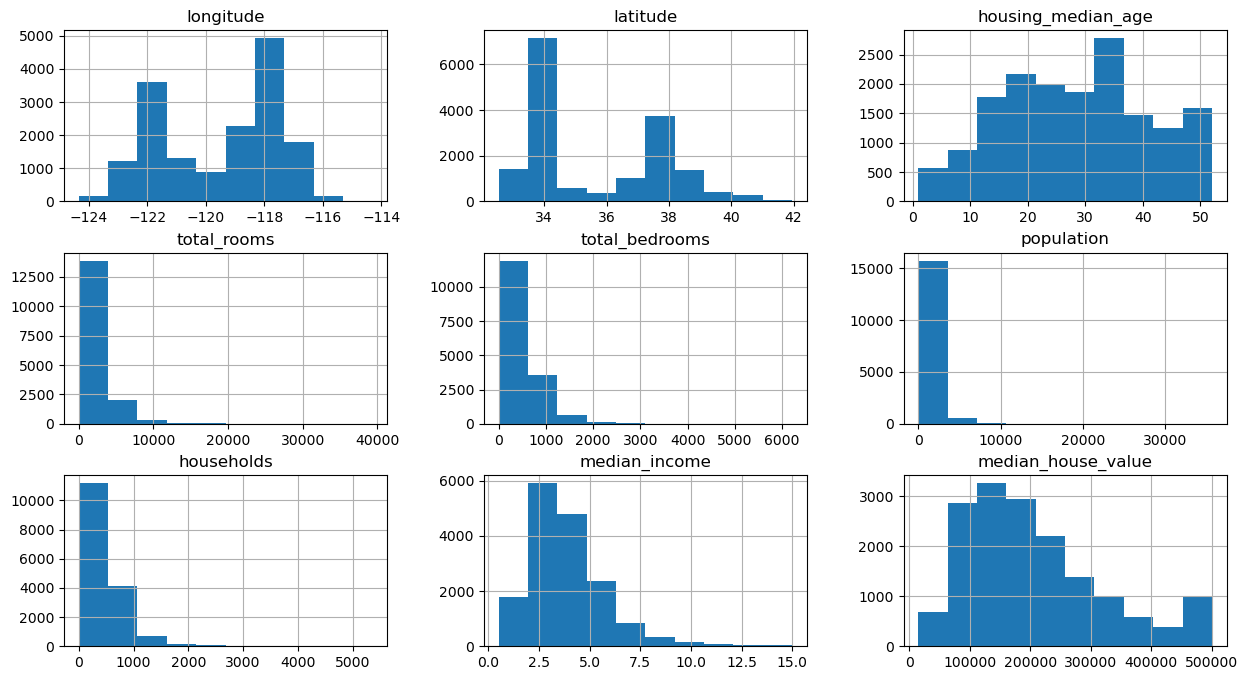

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.corr()

/tmp/ipykernel_96/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924541,-0.111036,0.047490,0.072006,0.103952,0.058322,-0.017389,-0.048680
latitude,-0.924541,1.000000,0.012529,-0.037453,-0.067849,-0.110236,-0.072192,-0.078257,-0.142230
housing_median_age,-0.111036,0.012529,1.000000,-0.361909,-0.323824,-0.301429,-0.306572,-0.114963,0.110847
total_rooms,0.047490,-0.037453,-0.361909,1.000000,0.931158,0.862443,0.919947,0.196844,0.130084
total_bedrooms,0.072006,-0.067849,-0.323824,0.931158,1.000000,0.880032,0.979434,-0.007062,0.047201
population,0.103952,-0.110236,-0.301429,0.862443,0.880032,1.000000,0.909410,0.007931,-0.025061
households,0.058322,-0.072192,-0.306572,0.919947,0.979434,0.909410,1.000000,0.014713,0.063169
median_income,-0.017389,-0.078257,-0.114963,0.196844,-0.007062,0.007931,0.014713,1.000000,0.688257
median_house_value,-0.048680,-0.142230,0.110847,0.130084,0.047201,-0.025061,0.063169,0.688257,1.000000


/tmp/ipykernel_96/842231939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')


<Axes: >

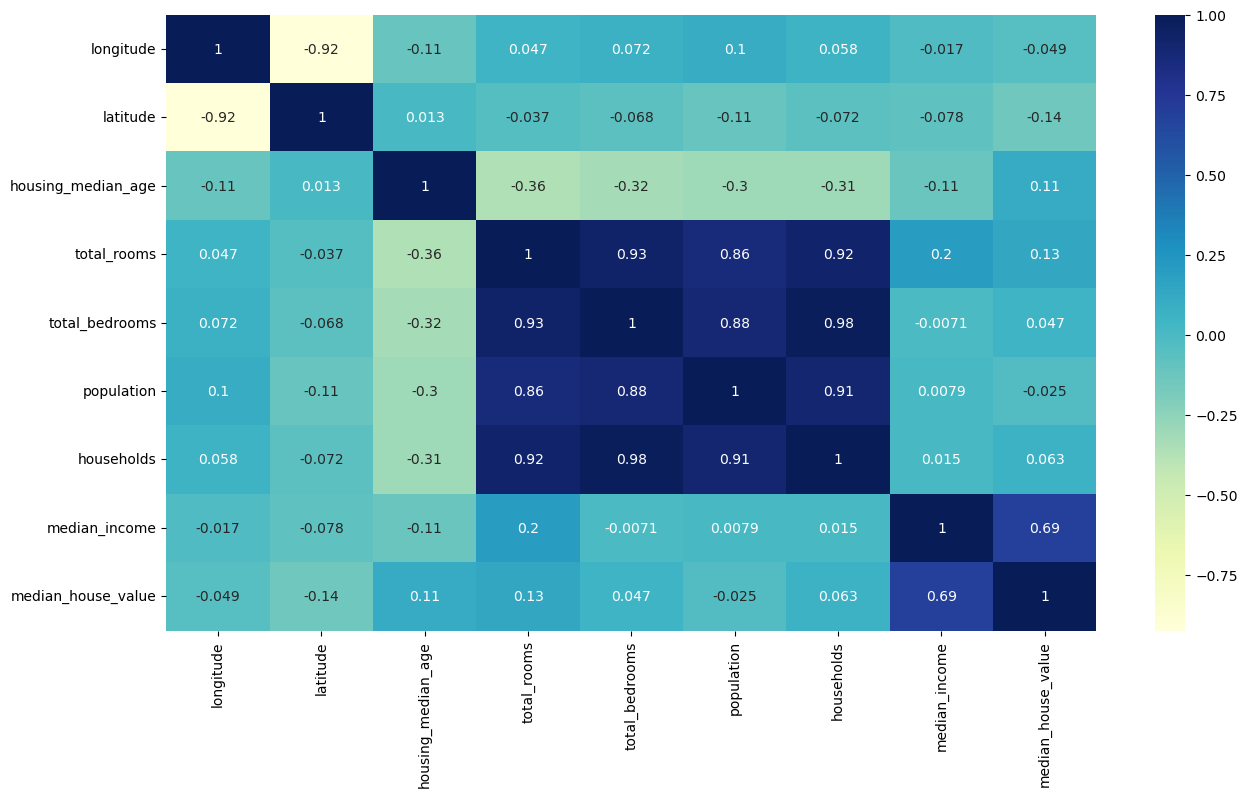

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

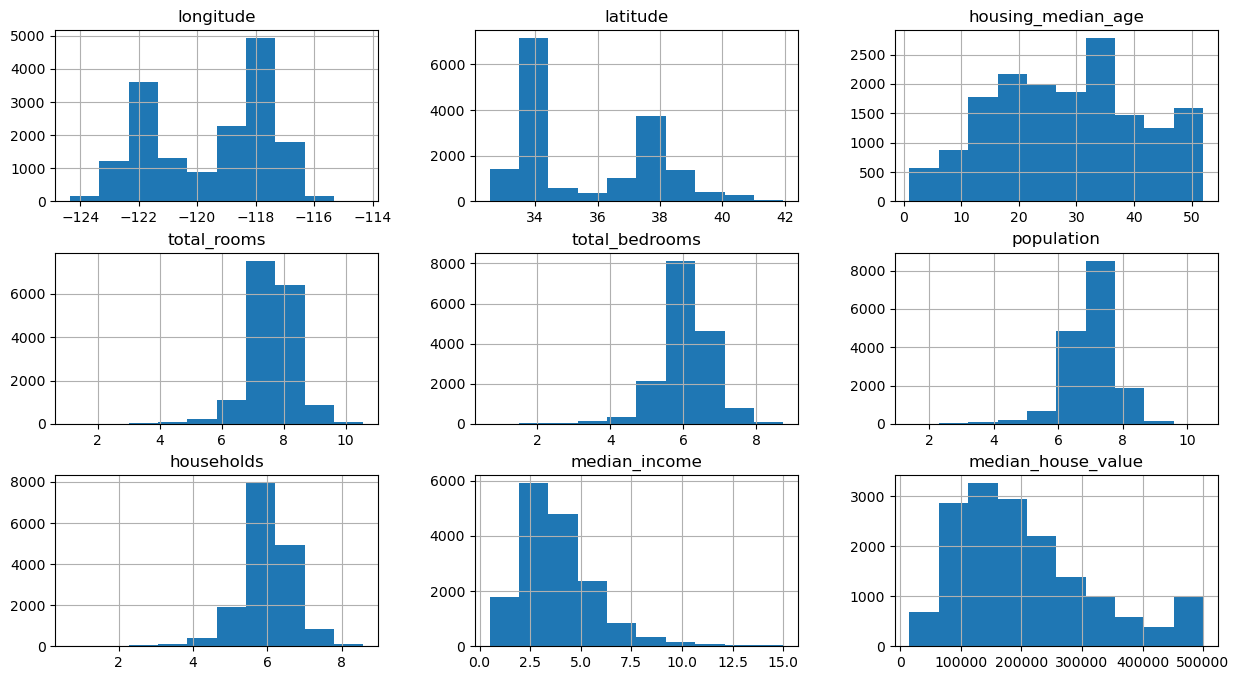

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7216
INLAND        5236
NEAR OCEAN    2085
NEAR BAY      1805
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20334,-119.01,34.23,11.0,8.663196,6.943122,7.923348,6.893656,4.6930,232200.0,1,0,0,0,0
10320,-117.78,33.85,16.0,8.238008,6.224558,7.418181,6.214608,7.2554,335600.0,1,0,0,0,0
4194,-118.23,34.12,32.0,7.647309,6.198479,7.254178,6.173786,4.5089,221100.0,1,0,0,0,0
18018,-121.95,37.25,30.0,8.101375,6.453625,7.334982,6.401917,5.0863,332000.0,1,0,0,0,0
18030,-121.91,37.24,30.0,7.752765,6.040255,7.016610,5.921578,4.7279,272000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,-122.33,38.21,33.0,7.609862,5.916202,6.856462,5.837730,4.6250,228600.0,0,0,0,1,0
13754,-117.15,34.04,14.0,7.953670,6.042633,7.067320,5.934894,7.5822,283100.0,0,1,0,0,0
8833,-118.37,34.09,31.0,8.756053,7.510978,7.847763,7.470794,3.2818,225000.0,1,0,0,0,0
7428,-118.21,33.95,32.0,7.018402,5.796058,7.143618,5.713733,2.2950,155200.0,1,0,0,0,0


<Axes: >

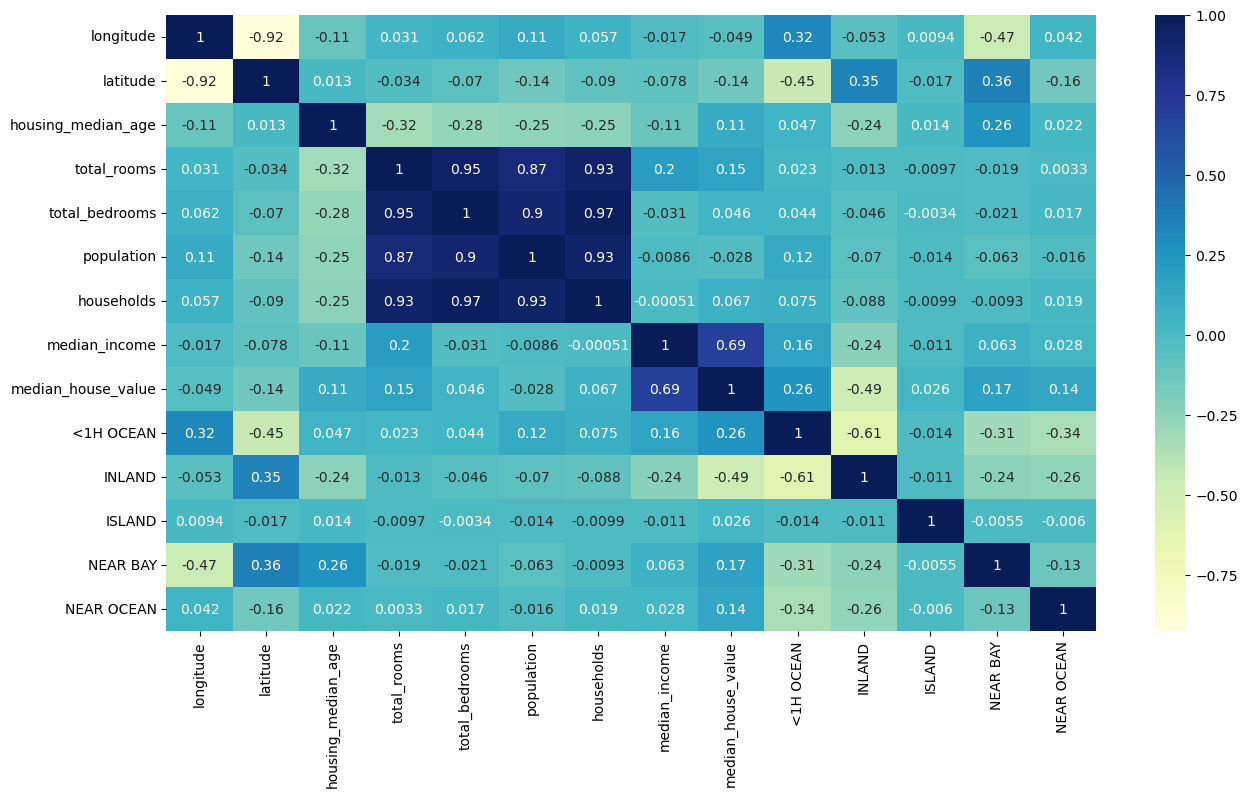

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

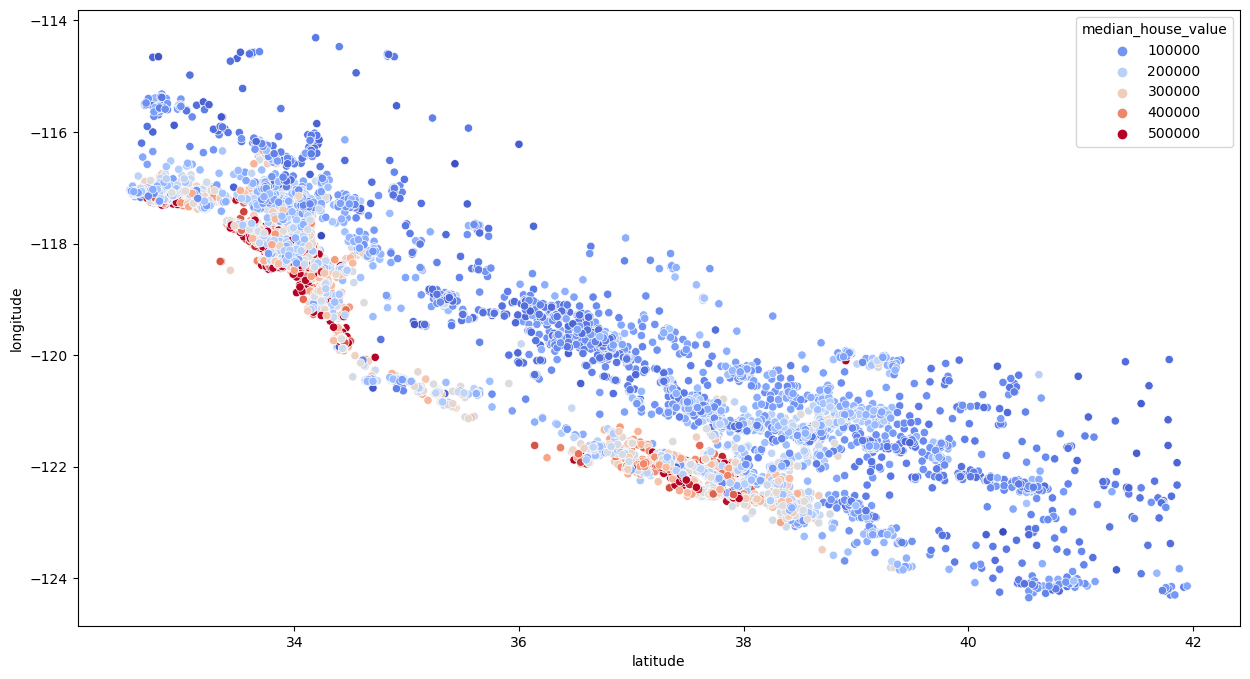

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value",palette="coolwarm")

In [24]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

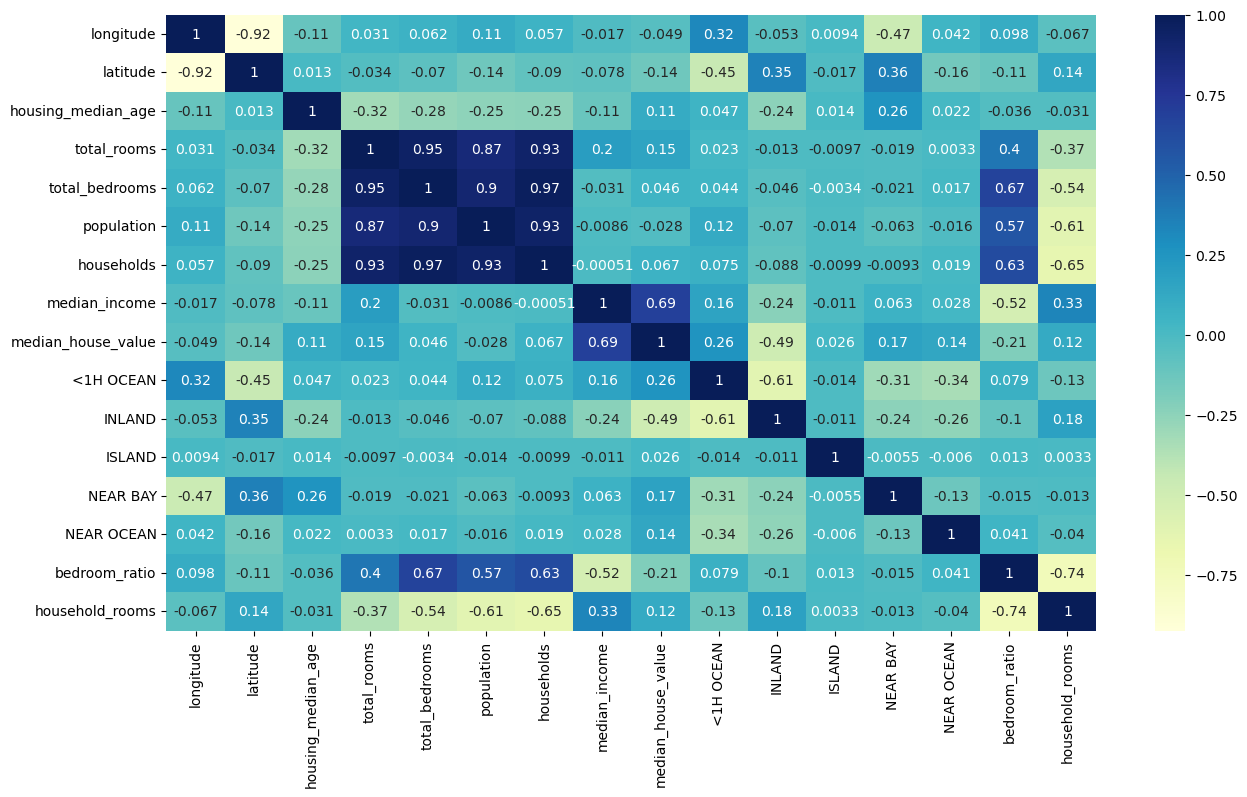

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,y_train=train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']
X_test,y_test=test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [28]:
X_test_s=scaler.transform(X_test)

In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20334,-119.01,34.23,11.0,8.663196,6.943122,7.923348,6.893656,4.6930,232200.0,1,0,0,0,0,0.801450,1.256691
10320,-117.78,33.85,16.0,8.238008,6.224558,7.418181,6.214608,7.2554,335600.0,1,0,0,0,0,0.755590,1.325588
4194,-118.23,34.12,32.0,7.647309,6.198479,7.254178,6.173786,4.5089,221100.0,1,0,0,0,0,0.810544,1.238674
18018,-121.95,37.25,30.0,8.101375,6.453625,7.334982,6.401917,5.0863,332000.0,1,0,0,0,0,0.796609,1.265461
18030,-121.91,37.24,30.0,7.752765,6.040255,7.016610,5.921578,4.7279,272000.0,1,0,0,0,0,0.779110,1.309240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,-122.33,38.21,33.0,7.609862,5.916202,6.856462,5.837730,4.6250,228600.0,0,0,0,1,0,0.777439,1.303565
13754,-117.15,34.04,14.0,7.953670,6.042633,7.067320,5.934894,7.5822,283100.0,0,1,0,0,0,0.759729,1.340154
8833,-118.37,34.09,31.0,8.756053,7.510978,7.847763,7.470794,3.2818,225000.0,1,0,0,0,0,0.857804,1.172038
7428,-118.21,33.95,32.0,7.018402,5.796058,7.143618,5.713733,2.2950,155200.0,1,0,0,0,0,0.825837,1.228339


In [30]:
reg.score(X_test, y_test)

0.6726530032898614

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test_s,y_test)

0.8207294427187526

In [34]:
from sklearn.model_selection import GridSearchCV
foret = RandomForestRegressor()
param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [36]:
grid_search.best_estimator_.score(X_test_s,y_test)

0.8226678962262716